In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import string

In [2]:
train=pd.read_csv('twitter_training.csv')
test=pd.read_csv('twitter_validation.csv')

In [3]:
print(train.shape)
print(test.shape)

(74681, 4)
(999, 4)


In [4]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
cols=['Tweet_id','Entity','Sentiment','Tweet_content']
train=pd.read_csv('twitter_training.csv',names=cols)
train.head()

,Tweet_id,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
test=pd.read_csv('twitter_validation.csv',names=cols)
test.head()

,Tweet_id,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_id       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
train.isnull().sum()

Tweet_id           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [10]:
test.isnull().sum()

Tweet_id         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [11]:
train.dropna(inplace=True)

In [12]:
train.describe()

,Tweet_id
count,73996.000000
mean,6430.279231
std,3737.660027
min,1.000000
25%,3194.000000
50%,6417.500000
75%,9595.000000
max,13200.000000


In [13]:
test.describe()

,Tweet_id
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


In [14]:
temp=train.groupby('Sentiment').count()['Tweet_content'].reset_index().sort_values(by='Tweet_content',ascending=False)
print(temp)

    Sentiment  Tweet_content
1    Negative          22358
3    Positive          20655
2     Neutral          18108
0  Irrelevant          12875


<Axes: xlabel='Sentiment', ylabel='count'>

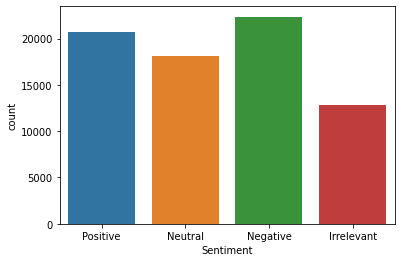

In [15]:
sns.countplot(data=train,x='Sentiment',hue='Sentiment')

Hence it can be concluded that:<br>There are more negative tweets than positive tweets.

In [16]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
def preprocess(text):
    if pd.isnull(text):
        return ""
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in string.punctuation]
    return " ".join(filtered_tokens)

In [17]:
train['Tweet_content']=train['Tweet_content'].apply(preprocess)

In [18]:
train.head()

,Tweet_id,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting borderland murder
1,2401,Borderlands,Positive,coming border kill
2,2401,Borderlands,Positive,im getting borderland kill
3,2401,Borderlands,Positive,im coming borderland murder
4,2401,Borderlands,Positive,im getting borderland 2 murder


In [19]:
test['Tweet_content']=test['Tweet_content'].apply(preprocess)

In [20]:
test.head()

,Tweet_id,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,bbc news amazon bos jeff bezos reject claim co...
2,8312,Microsoft,Negative,microsoft pay word function poorly samsungus c...
3,4371,CS-GO,Negative,csgo matchmaking full closet hacking 's truly ...
4,4433,Google,Neutral,president slapping american face really commit...


In [21]:
combined=pd.concat([train,test],ignore_index=True)

In [22]:
combined

,Tweet_id,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting borderland murder
1,2401,Borderlands,Positive,coming border kill
2,2401,Borderlands,Positive,im getting borderland kill
3,2401,Borderlands,Positive,im coming borderland murder
4,2401,Borderlands,Positive,im getting borderland 2 murder
...,...,...,...,...
74991,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ toronto art culture capital canada ’ wonder...
74992,4359,CS-GO,Irrelevant,actually good move tot bring viewer one people...
74993,2652,Borderlands,Positive,today sucked ’ time drink wine n play borderla...
74994,8069,Microsoft,Positive,bought fraction microsoft today small win


In [23]:
vectorizer=TfidfVectorizer(max_features=1000)
x=vectorizer.fit_transform(combined['Tweet_content']).toarray()
y=combined['Sentiment']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=combined['Sentiment'],random_state=42)

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(59996, 1000)
(59996,)
(15000, 1000)
(15000,)


In [26]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [27]:
predict=model.predict(X_train)
acc=accuracy_score(Y_train,predict)
print(acc)

0.6123741582772185


In [28]:
test_predict=model.predict(X_test)
test_acc=accuracy_score(Y_test,test_predict)
print(test_acc)

0.5930666666666666


In [29]:
def check(text):
    new_text=vectorizer.transform(text).toarray()
    pred=model.predict(new_text)
    print("Predicted Label:", pred)

In [30]:
check(['This is good'])

Predicted Label: ['Positive']


In [31]:
check(['Watch this !'])

Predicted Label: ['Neutral']


In [32]:
check(['This is hell'])

Predicted Label: ['Negative']


In [33]:
check(['This is heaven'])

Predicted Label: ['Positive']


In [34]:
check(['Jack and Jill went up the hill'])

Predicted Label: ['Neutral']


In [35]:
check(['I hate that person'])

Predicted Label: ['Negative']
